In [151]:
import numpy as np
import matplotlib.pyplot as plt 
import pathlib
import os
import pdb  

figs_path = pathlib.Path.cwd().parent.joinpath('figs') 

# set final figure dimensions (in inches)
full_width = 6.8
half_width = 3.5 
fig_height = 2.5

# set fraction of final figure per panel
p1_width = 0.5
p1_hpad = 0.06
p2_width = 0.4

# Create signal

In [152]:
time_end = 1
samp_freq = 0.001
time = np.arange(0,time_end+samp_freq,samp_freq)

signal = np.zeros(len(time)) 

freq_min = 1
freq_max = 50
freq_instances = 10 
frequencies = np.array([3, 11, 19, 24, 41])
frequency_amplitudes = np.random.rand(freq_instances)

for freq, amp in zip(frequencies, frequency_amplitudes): 
    signal = signal + amp*np.sin(2*np.pi*freq*time)     

# Find frequency content

In [153]:
tpCount     = len(signal)  
fft = np.fft.fft(signal)/len(signal)
fft = fft[:int(tpCount/2+1)] 
values      = np.arange(int(tpCount/2+1))
timePeriod  = tpCount/samp_freq
k = values 
fft_amp = np.abs(fft)*2 

# Plot panel

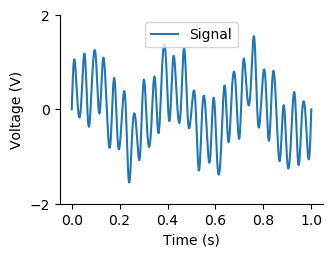

In [154]:
def plot_sin( ax_function, x, y):
            
    ax_function.plot(x, y, label='Signal')
    
    y_limits = np.array([ np.min(y), np.max(y) ])
    ylim_round = np.round(y_limits*1.2,1)
    ax_function.set_ylim(ylim_round)
    
    ytick_limits = np.round(y_limits*1.1)
    yticks = np.linspace(ytick_limits[0], ytick_limits[1], 3)
    ax_function.set_yticks(yticks)
    
    spines_toset_invisible = ['top','right']
    for spine in spines_toset_invisible:
        ax_function.spines[spine].set_visible(False)
        
    ax_function.set_xlabel('Time (s)')
    ax_function.set_ylabel('Voltage (V)')
    
    ax_function.legend(loc='upper center')
         
fig, ax = plt.subplots(1,1, 
                       squeeze=False, 
                       figsize=(full_width*p1_width , fig_height),
                       dpi = 100) 

plot_sin( ax[0,0] , time, signal)

# plot frequency spectrum

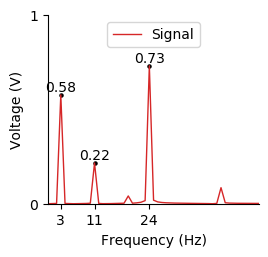

In [155]:
def plot_fft( ax_function, x, y):
    
    next_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][3]
    ax_function.plot(x, y, 
                     label='Signal',
                    linewidth = 1,
                    color=next_color)

    ax_function.set_xlim([0,50])
    
    y_limits = np.array([ np.min(y), np.max(y) ])
    ylim_round = np.round(y_limits*1.2)
    ax_function.set_ylim(ylim_round)
    
    
    threshold = 0.1 
    bool_above_threshold = y > 0.1
    
    xticks = x[bool_above_threshold]
    ax_function.set_xticks(xticks)
        
    ytick_limits = np.round(y_limits*1.1)
    yticks = np.linspace(ytick_limits[0], ytick_limits[1], 2)
    ax_function.set_yticks(yticks)
    
    spines_toset_invisible = ['top','right']
    for spine in spines_toset_invisible:
        ax_function.spines[spine].set_visible(False)
        
    ax_function.set_xlabel('Frequency (Hz)')
    ax_function.set_ylabel('Voltage (V)')
    
    ypeaks = y[bool_above_threshold]
    for xpeak, ypeak in zip(xticks,ypeaks): 
        ax_function.annotate( np.round(ypeak,2), 
                             [xpeak, ypeak],
                            ha='center',va='bottom')
        ax_function.scatter(xpeak,ypeak,5,'k')
    
    ax_function.legend(loc='upper center')
         

fig, ax = plt.subplots(1,1, 
                       squeeze=False, 
                       figsize=(full_width*p2_width, fig_height),
                       dpi = 100) 
plot_fft(ax[0,0], k, fft_amp) 

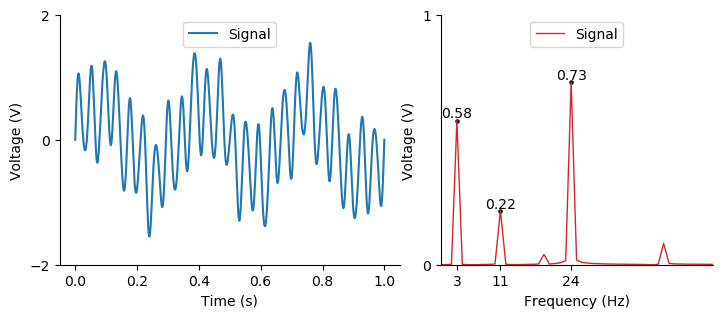

In [156]:
fig = plt.figure( figsize=(full_width,fig_height) ,dpi = 100)

# p1_width = 0.5
# p1_hpad = 0.06
# p2_width = 0.4

ax0= plt.axes([0 ,0 ,p1_width , 1] )  
ax1= plt.axes([p1_width+p1_hpad, 0,p2_width,1] )   

plot_sin( ax0 , time, signal)
plot_fft( ax1 , k, fft_amp)

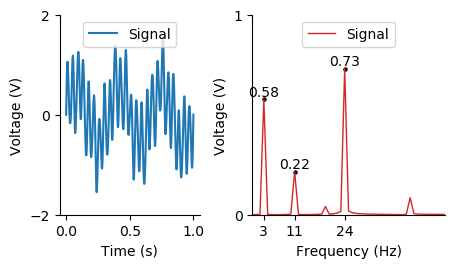

In [157]:
fig = plt.figure( figsize=(half_width,2) ,dpi = 100)

p1_width = 0.4
p1_hpad = 0.15
p2_width = 0.55

ax0= plt.axes([0 ,0 ,p1_width , 1] )  
ax1= plt.axes([p1_width+p1_hpad, 0,p2_width,1] )   

plot_sin( ax0 , time, signal)
plot_fft( ax1 , k, fft_amp)

In [158]:
fig_name = 'figure_example_fig1'

def save_fig(fig, figs_dir, fig_name ): 
    fig_pathname = os.path.join( figs_dir, fig_name ) 
    
    print('Saving to: {}.svg '.format( fig_pathname))  
    
    fig.savefig( fig_pathname + '.png',
            format='png',  transparent= True,
            bbox_inches = 'tight', pad_inches = 0,
            )   
    
    fig.savefig( fig_pathname + '.svg',
            format='svg',  transparent= True,
            bbox_inches = 'tight', pad_inches = 0,
            )   
    
save_fig(fig, figs_path, fig_name)


Saving to: /home/thomas/Projects/scientific_figures/figs/figure_example_fig1.svg 
